<h1>Задание</h1>
<p>1) Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.</p>
<p>2) Какой клиент совершил больше всего успешных операций? (success == True) </p>
<p>3) С какой платформы осуществляется наибольшее количество успешных операций? </p>
<p>4) Какую платформу предпочитают премиумные клиенты?</p>
<p>5) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)</p>
<p>6) Постройте график распределения числа успешных операций</p>
<p>7) Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?</p>

<h1>Описание данных</h1>

<b>user_data:</b>

<p>client – идентификатор пользователя</p>
<p>premium – является ли клиент премиум</p>
<p>age – возраст</p>

<b>logs:</b>
<p>client – идентификатор пользователя</p>
<p>success – результат (успех - 1, нет - 0)</p>
<p>platform – платформа</p>
<p>time – время в формате Unix</p>

<h1>1 - Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_user_data = pd.read_csv('user_data.csv')
df_logs = pd.read_csv('logs.csv')

In [3]:
df_user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
# Типы данных
df_user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
df_logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [8]:
# Проверка размера наших датафреймов
df_user_data.shape

(2954, 3)

In [9]:
df_logs.shape

(4500, 4)

In [12]:
# Проверка на пропущенные значения
df_user_data.isna

<bound method DataFrame.isna of       client  premium  age
0      46346    False   58
1       4391    False   55
2      27372    False   64
3      11989    False   44
4      60664    False   49
...      ...      ...  ...
2949   19411    False   29
2950   61579    False   50
2951   61221     True   64
2952   29863    False   46
2953   78499    False   36

[2954 rows x 3 columns]>

In [11]:
df_logs.isna

<bound method DataFrame.isna of       client  success  platform        time
0      40177     True     phone  1585412212
1      61468     True     phone  1585425658
2      35604    False     phone  1585459894
3       9961     True     phone  1585400189
4      10931     True  computer  1585468629
...      ...      ...       ...         ...
4495   64496    False  computer  1585459072
4496   73299     True     phone  1585458370
4497    8967     True     phone  1585465121
4498   52880    False     phone  1585455362
4499   40921     True     phone  1585437692

[4500 rows x 4 columns]>

In [13]:
# Описательная статистика
df_user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [14]:
df_logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


<h1>2 - Какой клиент совершил больше всего успешных операций? (success == True)</h1>

In [23]:
success_users = df_logs.query('success == True').groupby('client', as_index=False).agg({'success':'count'}).max()

In [25]:
success_users
# Из наших данных видно, что юзер 99993 совершил 41 успешную операцию

client     99993
success       41
dtype: int64

<h1>3 - С какой платформы осуществляется наибольшее количество успешных операций?</h1>

In [27]:
success_platforms = df_logs.query('success == True').groupby('platform').agg({'success':'count'})

In [29]:
success_platforms
# Из наших данных видно, что наибольшее количество успешных операция приходятся на смартфоны

,success
platform,
computer,1090
phone,2019
tablet,180


<h1>4 - Какую платформу предпочитают премиумные клиенты?</h1>

In [31]:
# Для решения данной задачи я создам новый dataframe, с помощью merge двух df
# Но перед этим я хочу достать отделить премиум клиентов

In [36]:
premium_users = df_user_data[df_user_data['premium'] == True]
platform_users = df_logs[['client','platform']]

In [37]:
df_premion_platform = premium_users.merge(platform_users, on='client')

In [39]:
df_premion_platform.groupby('platform').agg({'client':'count'})

,client
platform,
computer,150
phone,246
tablet,24


In [40]:
# Из наших данных видно, что большинство пользователей со статусом премиум используют смартфоны, за ними пользователи пк

<h1>5 - Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)</h1>

In [44]:
# Перед визуализацией данных я хочу подготовить правильно данные

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

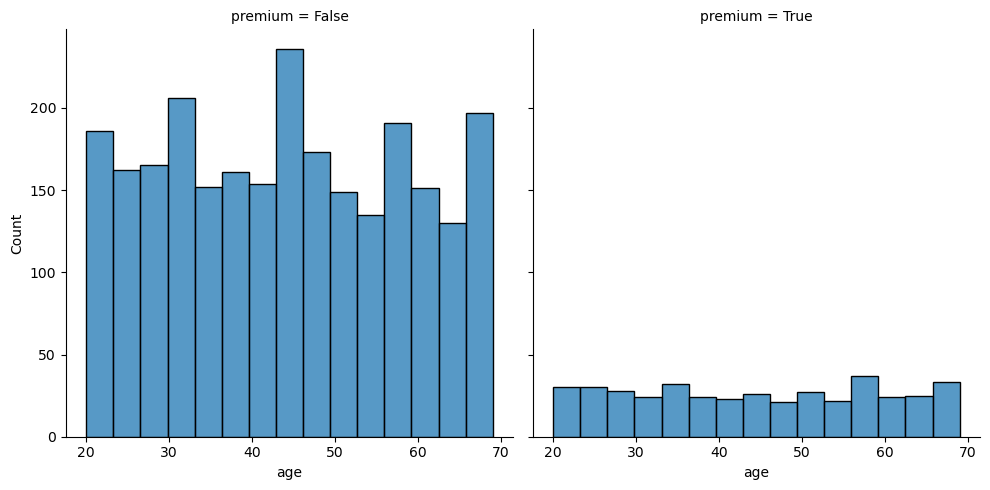

In [47]:
sns.displot(data=df_user_data, x="age", col="premium", kde=False)

<h1>6 - Постройте график распределения числа успешных операций</h1>

In [60]:
success_count = df_logs.loc[df_logs.success == True].client.value_counts()

<Axes: xlabel='count', ylabel='count'>

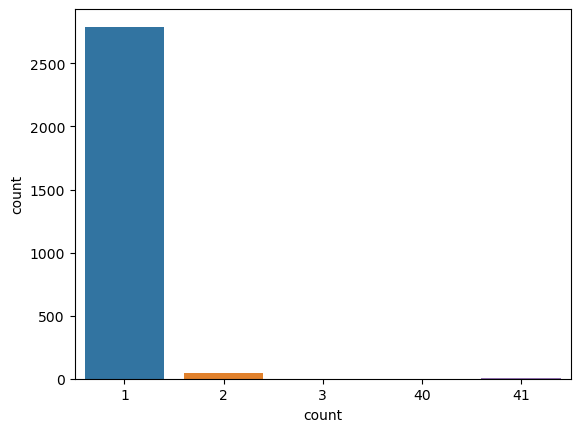

In [61]:
sns.countplot(x = success_count)

<h1>7 - Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?</h1>

In [62]:
users_logs = df_user_data.merge(df_logs, on='client')

In [69]:
success_computer_users = users_logs.query('success == True and platform == "computer"').groupby('age', as_index=False).agg({'success':'count'})

<Axes: xlabel='age'>

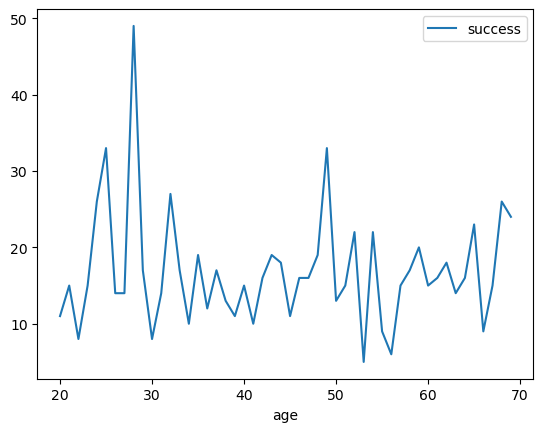

In [70]:
success_computer_users.plot(x='age', y='success', kind='line')